## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path= '/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
bnb_df= pd.read_csv(working_dir_path )

In [ ]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#missing data
total = bnb_df.isnull().sum().sort_values(ascending=False)
percent = (bnb_df.isnull().sum()/bnb_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [ ]:
#area popularity based on reviews in detail
deet1=bnb_df[['neighbourhood_group','neighbourhood','number_of_reviews']].groupby(['neighbourhood_group','neighbourhood'],as_index=True).sum()
deet1

number_of_reviews
neighbourhood_group neighbourhood                   
Bronx               Allerton                    1803
                    Baychester                   310
                    Belmont                      296
                    Bronxdale                    458
                    Castle Hill                  118
...                                              ...
Staten Island       Tottenville                  139
                    West Brighton                656
                    Westerleigh                   18
                    Willowbrook                    9
                    Woodrow                        0

[221 rows x 1 columns]

In [ ]:
#subtle stay preferences according to room types
area= bnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum()
area

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


In [ ]:
bronx=area.iloc[0:3].reset_index()
brook=area.iloc[3:6].reset_index()
man=area.iloc[6:9].reset_index()
queen=area.iloc[9:12].reset_index()
staten=area.iloc[12:].reset_index()
bronx.drop(["index","neighbourhood_group"],axis=1,inplace= True)
brook.drop(["index","neighbourhood_group"],axis=1,inplace= True)
man.drop(["index","neighbourhood_group"],axis=1,inplace= True)
queen.drop(["index","neighbourhood_group"],axis=1,inplace= True)
staten.drop(["index","neighbourhood_group"],axis=1,inplace= True)
d1= bronx.rename(columns={"number_of_reviews":"Bronx"})
d1

,room_type,Bronx
0,Entire home/apt,11627
1,Private room,16312
2,Shared room,432


In [ ]:
d2=brook.rename(columns={"number_of_reviews":"Brooklyn"})
d2

,room_type,Brooklyn
0,Entire home/apt,267128
1,Private room,213653
2,Shared room,5793


In [ ]:
d4=queen.rename(columns={"number_of_reviews":"Queens"})
d4

,room_type,Queens
0,Entire home/apt,60644
1,Private room,93561
2,Shared room,2745


In [ ]:
d3= man.rename(columns={"number_of_reviews":"Manchester"})
d3

,room_type,Manchester
0,Entire home/apt,235147
1,Private room,209150
2,Shared room,10272


In [ ]:
d5= staten.rename(columns={"number_of_reviews":"Staten"})
d5

,room_type,Staten
0,Entire home/apt,5857
1,Private room,5670
2,Shared room,14


In [ ]:
d12= pd.merge(d1,d2)
d123=pd.merge(d12,d3)
d1234= pd.merge(d123,d4)
popularity= pd.merge(d1234,d5)
popularity.index= ("Private room","Entire home/apt","Shared room")
popularity.drop(["room_type"], axis=1,inplace= True)
popular= popularity.transpose()
popular

,Private room,Entire home/apt,Shared room
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manchester,235147,209150,10272
Queens,60644,93561,2745
Staten,5857,5670,14


In [ ]:
# airbnb competitive hostings areawise
w= bnb_df['neighbourhood_group'].value_counts()
dfx= pd.DataFrame(w,columns=['neighbourhood_group'])
dfx.rename(columns={'neighbourhood_group':'hostings'})

,hostings
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [ ]:
#frequency of roomtypes in major areas
print("Brooklyn")
df1= bnb_df[bnb_df['neighbourhood_group'] == 'Brooklyn']['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Brooklyn'})
df1

Brooklyn


,room_type,Brooklyn
0,Private room,10132
1,Entire home/apt,9559
2,Shared room,413


In [ ]:
print("Manhattan")
df2= bnb_df[bnb_df['neighbourhood_group'] == 'Manhattan']['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Manhattan'})
df2

Manhattan


,room_type,Manhattan
0,Entire home/apt,13199
1,Private room,7982
2,Shared room,480


In [ ]:
print("Queens")
df3= bnb_df[bnb_df['neighbourhood_group'] == 'Queens']['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Queens'})
df3

Queens


,room_type,Queens
0,Private room,3372
1,Entire home/apt,2096
2,Shared room,198


In [ ]:
print("Bronx")
df4= bnb_df[bnb_df['neighbourhood_group'] == 'Bronx']['room_type'].value_counts().reset_index().rename(columns={'index':'room_type','room_type':'Bronx'})
df4

Bronx


,room_type,Bronx
0,Private room,652
1,Entire home/apt,379
2,Shared room,60


In [ ]:
print("Staten Island")
df5= bnb_df[bnb_df['neighbourhood_group'] == 'Staten Island']['room_type'].value_counts().reset_index().rename(columns={'index':'room_type', 'room_type':'Staten'})
df5

Staten Island


,room_type,Staten
0,Private room,188
1,Entire home/apt,176
2,Shared room,9


In [ ]:
df6= pd.merge(df4,df5)
df7= pd.merge(df3,df6)
df8= pd.merge(df2,df7)
rtypes= pd.merge(df1,df8)
rtypes.index= ("Private room","Entire home/apt","Shared room")
rtypes.drop(["room_type"], axis=1,inplace= True)
rtype= rtypes.transpose()
rtype

,Private room,Entire home/apt,Shared room
Brooklyn,10132,9559,413
Manhattan,7982,13199,480
Queens,3372,2096,198
Bronx,652,379,60
Staten,188,176,9


Text(0, 0.5, 'Frequency')

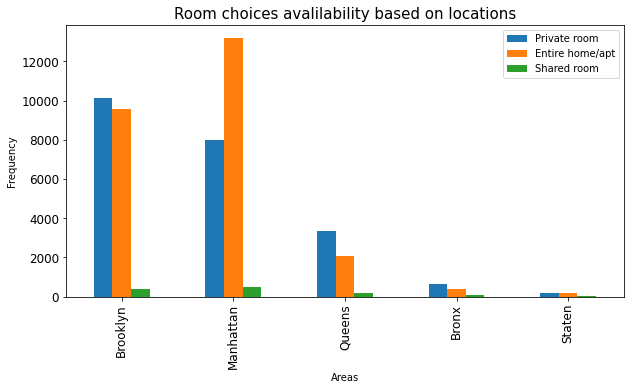

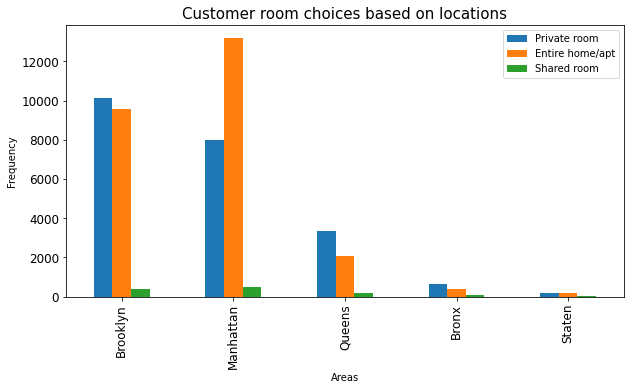

In [ ]:
#comparative analysis of availability and popularity
rooms= rtype.plot.bar(figsize= (10,5),fontsize= 12)
rooms.set_title("Room choices avalilability based on locations", fontsize= 15)
rooms.set_xlabel("Areas")
rooms.set_ylabel("Frequency")

pop= rtype.plot.bar(figsize= (10,5),fontsize= 12)
pop.set_title("Customer room choices based on locations", fontsize= 15)
pop.set_xlabel("Areas")
pop.set_ylabel("Frequency")


In [ ]:
# average pricing
bnb_df[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"], as_index = True).mean().rename(columns={'price':'average price'})

,average price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


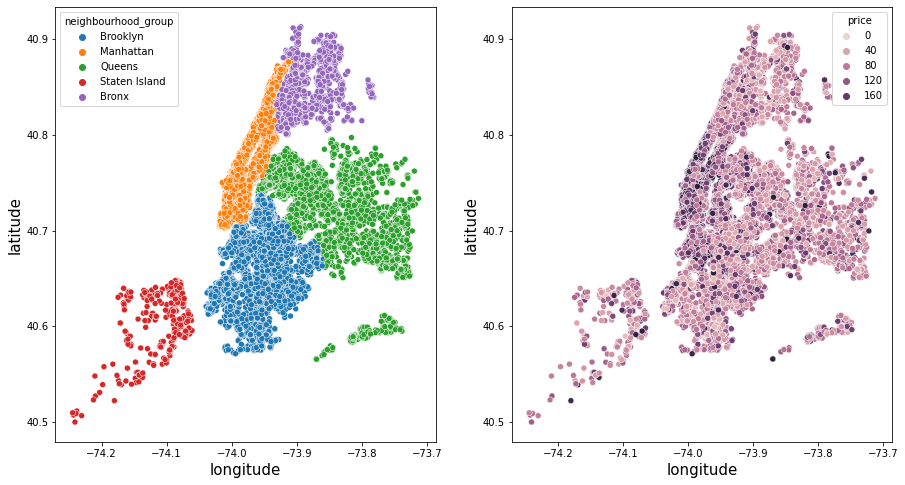

In [ ]:
#according to the availability and price wrt latitudes and longitudes
f,ax = plt.subplots(1, 2, figsize = (15, 8))
sns.scatterplot(bnb_df["longitude"], bnb_df["latitude"], hue = bnb_df["neighbourhood_group"], ax=ax[0])
ax[0].set_xlabel("longitude", fontsize = 15)
ax[0].set_ylabel("latitude", fontsize = 15)
#the range of prices close to 200, as its close to the mean
sns.scatterplot(bnb_df["longitude"], bnb_df["latitude"], hue = bnb_df[bnb_df["price"] < 200]["price"], ax=ax[1])
ax[1].set_xlabel("longitude", fontsize = 15)
ax[1].set_ylabel("latitude", fontsize = 15)

plt.show()

In [ ]:
#average pricing in detail
deet2= bnb_df[["neighbourhood_group","neighbourhood", "price"]].groupby(["neighbourhood_group","neighbourhood"], as_index = True).mean().rename(columns={'price':'avg price'})
deet2

avg price
neighbourhood_group neighbourhood            
Bronx               Allerton        87.595238
                    Baychester      75.428571
                    Belmont         77.125000
                    Bronxdale       57.105263
                    Castle Hill     63.000000
...                                       ...
Staten Island       Tottenville    144.857143
                    West Brighton   80.555556
                    Westerleigh     71.500000
                    Willowbrook    249.000000
                    Woodrow        700.000000

[221 rows x 1 columns]

In [ ]:
#hosts
host_df= bnb_df.groupby(['neighbourhood','host_name'])['number_of_reviews'].sum().reset_index()
host_df

,neighbourhood,host_name,number_of_reviews
0,Allerton,Alex,28
1,Allerton,Amoyiem,3
2,Allerton,Antrice,7
3,Allerton,Buddy,45
4,Allerton,Che,0
...,...,...,...
28864,Woodside,Zain,42
28865,Woodside,Zeyna,2
28866,Woodside,Zia,9
28867,Woodside,Zoe,9


In [ ]:
#ranking according to host n area popularity
host_df.sort_values(by='number_of_reviews', ascending= False)

,neighbourhood,host_name,number_of_reviews
7977,East Elmhurst,Maya,2273
20449,Prospect Heights,Brooklyn& Breakfast -Len-,2205
7925,East Elmhurst,Danielle,2017
15760,Hell's Kitchen,Yasu & Akiko,1971
1147,Bedford-Stuyvesant,Brady,1818
...,...,...,...
22254,South Slope,DeAnna,0
7029,Crown Heights,Kylie,0
22243,South Slope,Christina,0
22239,South Slope,Cheryl,0
